<a href="https://colab.research.google.com/github/eleven111101/PCA_PracticalComponentAnalysis/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
print("hello World ")

hello World 


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
train=pd.read_csv("/content/train.csv",index_col = 0)
test=pd.read_csv("/content/test.csv",index_col = 0)

In [109]:
print(train.shape)
print(test.shape)

(103904, 24)
(25976, 24)


In [110]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [112]:
train=train.dropna()
test=test.dropna()

In [113]:
cat_cols = list(train.select_dtypes(include=['object']).columns)
cat_cols.remove("satisfaction")

In [114]:
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [115]:
for col in cat_cols:
  train_dummies=pd.get_dummies(train[col],prefix=col,drop_first=True)
  train = pd.concat([train,train_dummies],axis=1)
  train = train.drop([col],axis=1)


  test_dummies=pd.get_dummies(test[col],prefix=col,drop_first=True)
  test = pd.concat([test,test_dummies],axis=1)
  test = test.drop([col],axis=1)

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Age                                103594 non-null  int64  
 2   Flight Distance                    103594 non-null  int64  
 3   Inflight wifi service              103594 non-null  int64  
 4   Departure/Arrival time convenient  103594 non-null  int64  
 5   Ease of Online booking             103594 non-null  int64  
 6   Gate location                      103594 non-null  int64  
 7   Food and drink                     103594 non-null  int64  
 8   Online boarding                    103594 non-null  int64  
 9   Seat comfort                       103594 non-null  int64  
 10  Inflight entertainment             103594 non-null  int64  
 11  On-board service                   103594 no

In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25893 non-null  int64  
 1   Age                                25893 non-null  int64  
 2   Flight Distance                    25893 non-null  int64  
 3   Inflight wifi service              25893 non-null  int64  
 4   Departure/Arrival time convenient  25893 non-null  int64  
 5   Ease of Online booking             25893 non-null  int64  
 6   Gate location                      25893 non-null  int64  
 7   Food and drink                     25893 non-null  int64  
 8   Online boarding                    25893 non-null  int64  
 9   Seat comfort                       25893 non-null  int64  
 10  Inflight entertainment             25893 non-null  int64  
 11  On-board service                   25893 non-null  int64  


In [118]:
X_train=train.drop(["satisfaction"],axis=1)
y_train=train["satisfaction"]

X_test=test.drop(["satisfaction"],axis=1)
y_test=test["satisfaction"]

In [119]:
from sklearn.preprocessing import StandardScaler



In [120]:
scaler=StandardScaler()

In [121]:
scaler.fit(X_train)

StandardScaler()

In [122]:
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rfc = RandomForestClassifier()

In [125]:
rfc.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [126]:
prediction =  rfc.predict(scaled_X_test)

In [127]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [128]:
print(classification_report(y_test,prediction))
print(f'Training Accuracy: {rfc.score(scaled_X_train, y_train)}')
print(f'Testing Accuracy: {rfc.score(scaled_X_test, y_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, prediction)}')
print(f'Accuracy Score: {accuracy_score(y_test, prediction)}')

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14528
              satisfied       0.97      0.94      0.96     11365

               accuracy                           0.96     25893
              macro avg       0.97      0.96      0.96     25893
           weighted avg       0.96      0.96      0.96     25893

Training Accuracy: 0.9999903469312894
Testing Accuracy: 0.9639670953539566
Confusion Matrix: 
[[14234   294]
 [  639 10726]]
Accuracy Score: 0.9639670953539566


In [129]:
from sklearn.decomposition import PCA

In [130]:
PCA = PCA(n_components=2)

In [131]:
PCA.fit(scaled_X_train)

PCA(n_components=2)

In [132]:
PCA_X_train = PCA.transform(scaled_X_train)
PCA_X_test = PCA.transform(scaled_X_test)

In [133]:
PCA_X_train.shape

(103594, 2)

In [134]:
y_train.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [135]:
y_train_num = y_train.apply(lambda x: 1 if x == 'satisfied' else 0)

Text(0, 0.5, 'Component 2')

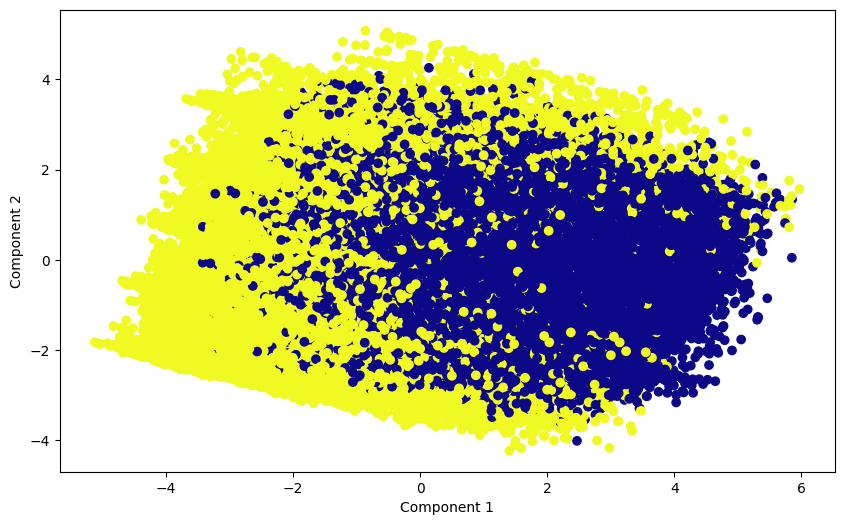

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(PCA_X_train[:, 0], PCA_X_train[:, 1], c=y_train_num, cmap='plasma')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [138]:
rf = RandomForestClassifier()
rf.fit(PCA_X_train, y_train)
PCA_prediction = rf.predict(PCA_X_test)

print(classification_report(y_test,PCA_prediction))

print(f'Confusion Matrix: \n{confusion_matrix(y_test, PCA_prediction)}')
print(f'Accuracy Score: {accuracy_score(y_test, PCA_prediction)}')

                         precision    recall  f1-score   support

neutral or dissatisfied       0.80      0.85      0.83     14528
              satisfied       0.80      0.73      0.76     11365

               accuracy                           0.80     25893
              macro avg       0.80      0.79      0.80     25893
           weighted avg       0.80      0.80      0.80     25893

Confusion Matrix: 
[[12416  2112]
 [ 3026  8339]]
Accuracy Score: 0.8015679913490132
